# Ejercicio 2


## INTRODUCCION
En este ejercicio se lee una tabla de datos extraidos de http://skyserver.sdss.org/casjobs/ , mediante el uso del codigo SQL, y se analizan las distribuciones de color para averiguar si estan vinculadas a su tipo morfologico. Puntualmente se analizara el indice de color U-G y el indice de color G-R de las magnitudes aparentes de Petrosian para luego estudiar si estas distribuciones son igualmente probables en las dos morfologias mas comunes de galaxias (Eliptica y Espirales). 

## Metodo

Para esto se utiliza el ks-test que es simplemente obtneer la distribuciones acumuladas que se desean comparar y medir las diferencias entre un punto y el otro, devolviendo asi una variable "k" que representa la maxima diferencia entre estos puntos. Este metodo esta basado en el supuesto de que la hipotesis nula es verdadera y ambos datos provienen de la misma distribucion. Este test es sensible tanto a la ubicacion de la distribucion como a su forma lo que lo vuelve muy versatil a la hora de comparar dos distribuciones acumuladas. El estadistico sigue una distribucion de Kolmogorov. Este test puede rechazar la hipotesis nula si el valor $p < \alpha $ . El valor p, suponiendo que la hipotesis nula sea cierta, es como un limite que nos dice a partir de que valor, tomando un $\alpha$ arbitrario se puede o no rechazar la hipotesis nula, dicho valor obtenido es el del experimento en concreto que estamos haciendo. Entonces, para valores de $p$  altos no se puede rechazar la hipotesis nula, mientras que valores bajos de $p$ sí. Se eligue $\alpha = 0.05$



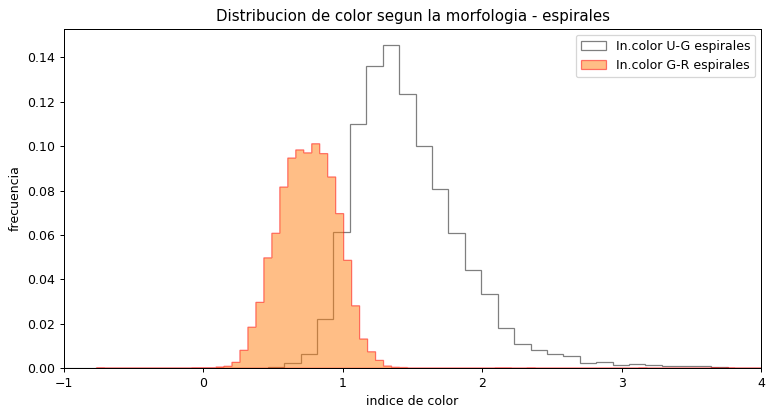

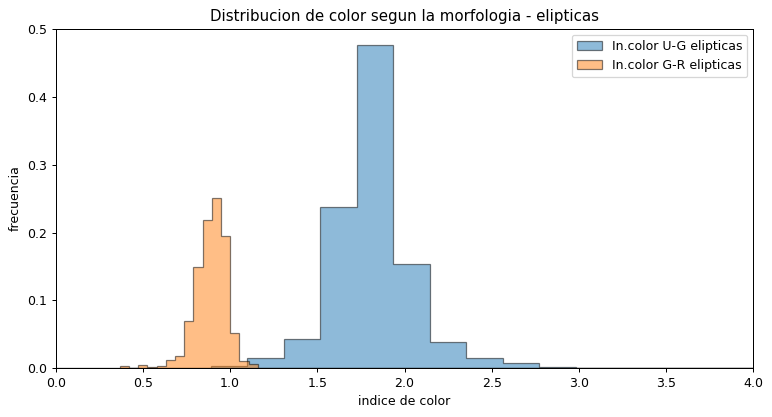

 
distribuciones acumuladas
 


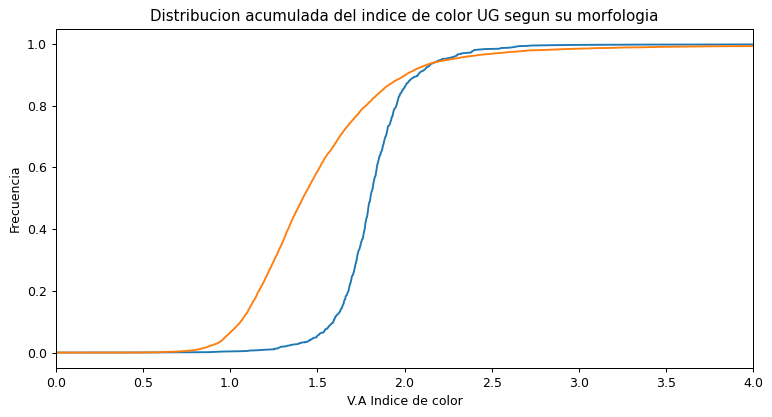

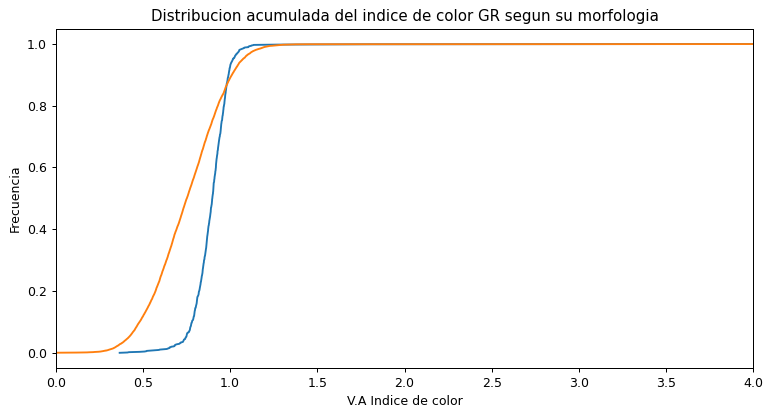

 
PRUEBA DE HIPOTESIS:
 
indice de color U-G


/usr/lib64/python3.8/site-packages/scipy/stats/stats.py:6262: RuntimeWarning: ks_2samp: Exact calculation incurred large rounding error. Switching to mode=asymp
  warnings.warn(


Hay informacion suficiente para rechazar la hipotesis nula. p = 1.1161799886605414e-246 < 0.05
 
indice de color G-R
Hay informacion suficiente para rechazar la hipotesis nula p 1.0256883387292688e-157 < 0.05


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
import scipy.stats as st


alpha=0.05

df = pd.read_csv('GUIA3_patricioc.csv')

A=df.sort_values(by=['spiral']) 
B=df.loc[df[ 'spiral' ] == 1]
C=df.loc[df[ 'elliptical' ] == 1]

magu=B['petroMag_u']
magr=B['petroMag_r']
magg=B['petroMag_g']
eli=B['elliptical']
esp=B['spiral']
colorug=magu-magg
colorgr=magg-magr

magu2=C['petroMag_u']
magr2=C['petroMag_r']
magg2=C['petroMag_g']
eli2=C['elliptical']
esp2=C['spiral']
colorug2=magu2-magg2
colorgr2=magg2-magr2

bi=np.linspace(-1,20,num=100)
bii=np.linspace(0,5,num=50)
binn=np.histogram_bin_edges(colorug, bins='scott', range=None, weights=None );
binn2=np.histogram_bin_edges(colorug2, bins='scott', range=None, weights=None );
binn3=np.histogram_bin_edges(colorgr, bins='scott', range=None, weights=None );
binn4=np.histogram_bin_edges(colorgr2, bins='scott', range=None, weights=None  );


np.histogram_bin_edges: 'scott'
plt.figure(figsize=(10, 5), dpi=90) #dpi es la resolucion
plt.hist(colorug,bins=binn,weights=np.ones_like(colorug) / len(colorug),
         alpha=0.5, label='In.color U-G espirales' , histtype='step', ec='black');
plt.hist(colorgr  ,bins=binn3, weights=np.ones_like(colorgr) / len(colorgr),
         alpha=0.5, label='In.color G-R espirales', histtype='stepfilled', ec='red');
plt.legend()
plt.xlim(-1,4)
plt.xlabel('indice de color')
plt.ylabel('frecuencia')
plt.title('Distribucion de color segun la morfologia - espirales')
plt.show()

# spiral
plt.figure(figsize=(10, 5), dpi=90) #dpi es la resolucion

plt.hist(colorug2  ,bins=binn2 ,weights=np.ones_like(colorug2) / len(colorug2),
         alpha=0.5, label='In.color U-G elipticas', histtype='stepfilled', ec='black');
plt.hist(colorgr2  ,bins=binn4 ,weights=np.ones_like(colorgr2) / len(colorgr2),
         alpha=0.5, label='In.color G-R elipticas', histtype='stepfilled', ec='black');

plt.legend()
plt.xlim(0,4)
plt.xlabel('indice de color')
plt.ylabel('frecuencia')
plt.title('Distribucion de color segun la morfologia - elipticas')
plt.show()


colorug2=colorug2.sort_values()
colorgr2=colorgr2.sort_values()
colorug=colorug.sort_values()
colorgr=colorgr.sort_values()

r1=np.array(range(len(colorug2)))
r2=np.array(range(len(colorug)))

r3=np.array(range(len(colorgr2)))
r4=np.array(range(len(colorgr)))

r1=r1/max(r1)
r2=r2/max(r2)
r3=r3/max(r3)
r4=r4/max(r4)

plt.figure(figsize=(10, 5), dpi=90) #dpi es la resolucion
print(' ')
print('distribuciones acumuladas')
print(' ')
plt.plot(colorug2,r1,label='In.color U-G elipticas')
plt.plot(colorug,r2, label='In.color U-G espirales')
plt.xlabel('V.A Indice de color')
plt.ylabel('Frecuencia')
plt.title('Distribucion acumulada del indice de color UG segun su morfologia')
plt.xlim(0,4)
plt.show()

plt.figure(figsize=(10, 5), dpi=90) #dpi es la resolucion
plt.plot(colorgr2,r3, label='In.color G-R eliptica')
plt.plot(colorgr,r4, label='In.color G-R espirales')
plt.xlabel('V.A Indice de color')
plt.ylabel('Frecuencia')
plt.title('Distribucion acumulada del indice de color GR segun su morfologia')
plt.xlim(0,4)
plt.show()

print(' ')
print ('PRUEBA DE HIPOTESIS:')
print (' ')

print ('indice de color U-G')
k,p=scipy.stats.ks_2samp(colorug2, colorug, alternative='two-sided', mode='exact')
if (p < (alpha)):
    print('Hay informacion suficiente para rechazar la hipotesis nula. p =',p,'<',(alpha));
else:
    print('no hay informacion suficiente para rechazar la hipotesis nula. p =',p,'= o >', (alpha));

    
print (' ')    

print ('indice de color G-R')
k,p=scipy.stats.ks_2samp(colorgr2, colorgr, alternative='two-sided', mode='exact')
if (p < alpha):
    print('Hay informacion suficiente para rechazar la hipotesis nula p',p,'<',alpha)
else:
    print('no hay informacion suficiente para rechazar la hipotesis nula p =',p,'= o >',alpha);

# CONCLUSION
Para este ejercicio, se concluye que realmente los colores para las distintas tipologias de galaxias son distintos y por lo tanto debe existir una relacion en su tipo morfologico sobre los colores que predominan. De todas maneras los resultados no son concluyentes debido a la no uniformidad de los datos en cuanto al tipo morfologico y al haber usado un test muy sensible a la forma de la distribucion acumulada como a la posicion es menester declarar no concluyente dicha premisa.